In [15]:
from sklearn.datasets import make_blobs


X,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)


In [16]:
import matplotlib.pyplot as plt
import numpy as np
print(sum(np.array(X))/len(X))

[0.46781757 2.74598363]


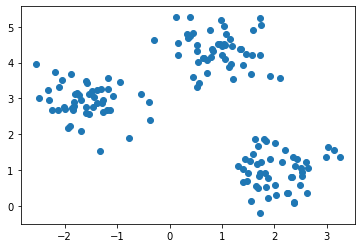

In [17]:
plt.scatter(X[:,0],X[:,1])
plt.show()

中心点已经确定


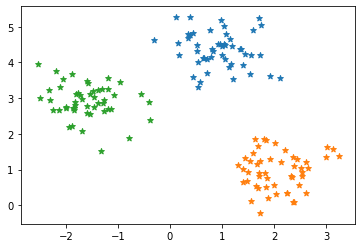

In [28]:
import random
def Dist(x,y):
    return np.sqrt(sum(np.square(np.array(x)-np.array(y))))
def clusterMean(dataset):
    return sum(np.array(dataset))/len(dataset)
def random(dataset,k):#生成k个随机值
    data=[]
    while len(data)<k:
        index = np.random.randint(0,len(dataset)-1)
        if index not in data:
            data.append(index)
        else:
            continue
    return np.array([dataset[i] for i in data])



def kmeans(dataset,dist,center,k):
    data=[]
    for _ in range(k):
        temp=[]
        data.append(temp)
    for i in dataset:
        temp=[]
        for j in center:
            temp.append(dist(i,j))
        data[temp.index(min(temp))].append(i) #将某个点划分到距离中心点最近的类别中
        
    newcenter = np.array([clusterMean(i) for i in data])
    
    if(newcenter==center).all():
        print("中心点已经确定")
        for i in range(k):
            plt.scatter([j[0] for j in data[i]],[j[1] for j in data[i]],marker='*')
    else:
        center = newcenter
        kmeans(dataset,dist,center,k)
        
        
        
def main(k):
    initial_center = random(dataset=X,k=k)
    kmeans(dataset=X,dist=Dist, center=initial_center,k=k)
    
if __name__ == '__main__':
    main(3) 
